In [1]:
# Import the required modules
import cv2
from IPython.display import clear_output
import time
import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np

In [2]:
#Use 'jpeg' instead of 'png' (~5 times faster)
def array_to_image(a, fmt='jpeg'):
    #Create binary stream object
    f = BytesIO()
    
    #Convert array to binary stream object
    PIL.Image.fromarray(a).save(f, fmt)
    
    return IPython.display.Image(data=f.getvalue())

In [3]:
def get_frame(cam):
    # Capture frame-by-frame
    ret, frame = cam.read()
    
    #flip image for natural viewing
    frame = cv2.flip(frame, 1)
    
    return frame

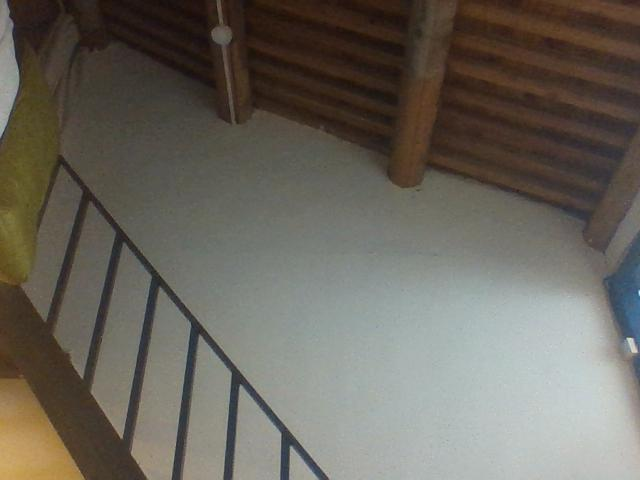

In [ ]:
cam = cv2.VideoCapture(0)

d = IPython.display.display("", display_id=1)
d2 = IPython.display.display("", display_id=2)
while True:
    try:
        t1 = time.time()
        frame = get_frame(cam)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        im = array_to_image(frame)
        
        d.update(im)
        
        t2 = time.time()
        
        s = f"""{int(1/(t2-t1))} FPS"""
        d2.update( IPython.display.HTML(s) )
    except KeyboardInterrupt:
        print()
        cam.release()
        IPython.display.clear_output()
        print ("Stream stopped")
        break